In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("train.csv")
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
print("\n各列缺失值统计：")
print(df.isnull().sum()[df.isnull().sum()>0])
num_cols=df.select_dtypes(include=[np.number]).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())
cat_cols=df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])
print("\n填充后缺失值统计：",df.isnull().sum().sum()) 


各列缺失值统计：
Series([], dtype: int64)

填充后缺失值统计： 0


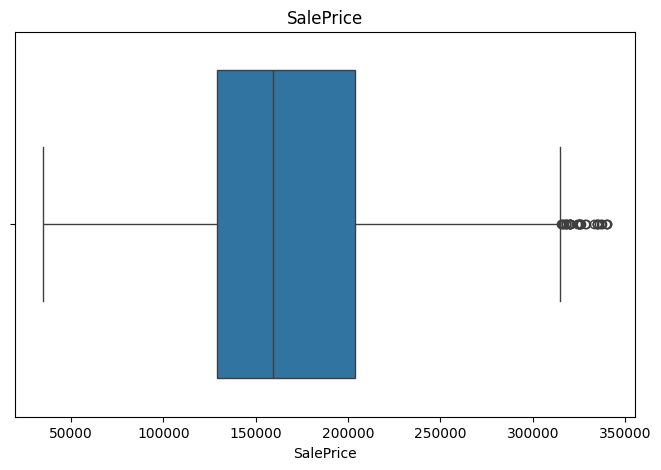

删除异常值前行数:1399,删除后行数:1366


In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["SalePrice"])
plt.title("SalePrice")
plt.show()
Q1=df["SalePrice"].quantile(0.25)
Q3=df["SalePrice"].quantile(0.75)
IQR=Q3-Q1
before_rows=df.shape[0]
df=df[~((df["SalePrice"]<(Q1-1.5*IQR))|(df["SalePrice"]>(Q3+1.5*IQR)))]
after_rows=df.shape[0]
print(f"删除异常值前行数:{before_rows},删除后行数:{after_rows}")

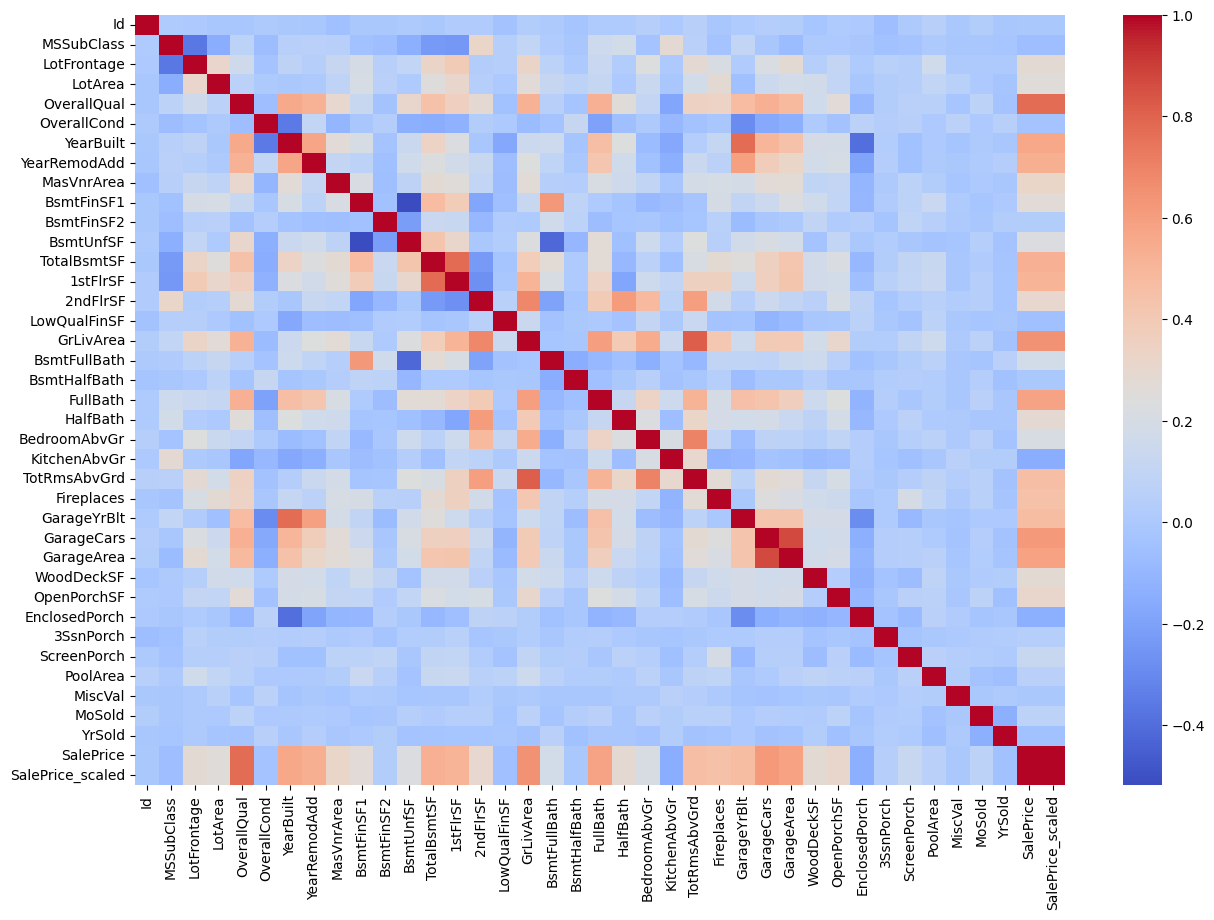

与 SalePrice 相关性最高的三个特征：
SalePrice_scaled    1.000000
OverallQual         0.769415
GrLivArea           0.646264
Name: SalePrice, dtype: float64


In [24]:
num_df=df.select_dtypes(include=[np.number]) 
corr=num_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=False,cmap="coolwarm")
plt.show()
corr_price=corr["SalePrice"].drop("SalePrice")  
top3=corr_price.abs().sort_values(ascending=False).head(3)
print("与 SalePrice 相关性最高的三个特征：")
print(top3)

In [26]:
scaler=StandardScaler()
df.loc[:,"SalePrice_scaled"]=scaler.fit_transform(df[["SalePrice"]])
print("\n标准化后的 SalePrice：")
print(df[["SalePrice", "SalePrice_scaled"]].head())


标准化后的 SalePrice：
   SalePrice  SalePrice_scaled
0     208500          0.769008
1     181500          0.275001
2     223500          1.043456
3     140000         -0.484305
4     250000          1.528314


In [27]:
df.loc[:,"SalePrice_bin"]=pd.qcut(df["SalePrice"], q=4,labels=["低","中低","中高","高"])
print("\n离散化后的 SalePrice：")
print(df[["SalePrice", "SalePrice_bin"]].head())


离散化后的 SalePrice：
   SalePrice SalePrice_bin
0     208500             高
1     181500            中高
2     223500             高
3     140000            中低
4     250000             高


In [28]:
num_df=df.select_dtypes(include=[np.number])
corr=num_df.corr()
corr_price=corr["SalePrice"].drop("SalePrice")
top3=corr_price.abs().sort_values(ascending=False).head(3)
print("\n与 SalePrice 相关性最高的三个特征：")
print(top3)


与 SalePrice 相关性最高的三个特征：
SalePrice_scaled    1.000000
OverallQual         0.769415
GrLivArea           0.646264
Name: SalePrice, dtype: float64
